#### https://online.stat.psu.edu/stat501/lesson/8

#### Deal with categories; Interaction terms -> piecewise linear regression

In [1]:
import os
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import Image
from statsmodels.formula.api import ols
import scipy.stats
from matplotlib import pyplot as plt
filedir = 'STAT501_Lesson08'
os.listdir(filedir)

['leadmoss.txt',
 'shipment.txt',
 'piecewise_linear_result.png',
 'birthsmokers.txt',
 'birthsmokers_02.txt',
 'piecewise_linear.png',
 'depression.txt',
 'strength_watercement.png']

In [2]:
df = pd.read_table(os.path.join(filedir, 'birthsmokers.txt'), encoding="utf-16")
df

,Wgt,Gest,Smoke
0,2940,38,1
1,3130,38,0
2,2420,36,1
3,2450,34,0
4,2760,39,1
5,2440,35,1
6,3226,40,0
7,3301,42,1
8,2729,37,0
9,3410,40,0


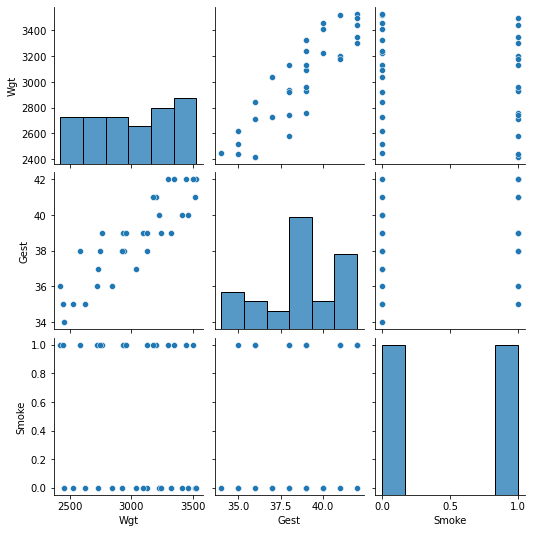

In [3]:
sns.pairplot(df)

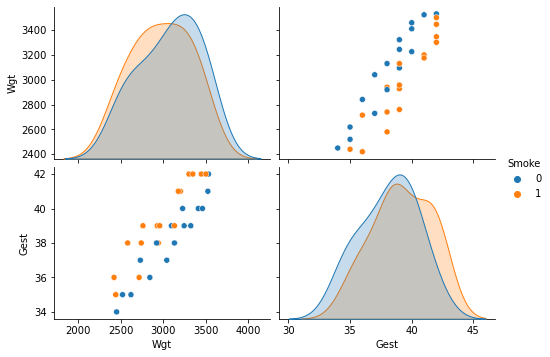

In [4]:
ax = sns.pairplot(df, hue='Smoke', aspect=11.7/8.27)

In [5]:
y = df['Wgt']
X = df[['Smoke','Gest']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           5.29e-15
Time:                        16:13:12   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2389.5729    349.206     -6.843      0.000   -3103.779   -1675.366
Smoke       -244.5440     41.982     -5.825      0.000    -330.406    -158.682
Gest         143.1003      9.128     15.677      0.000     124.431     161.769
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.162
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       2.084   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

If not smoke:
Weight = -2390 + 143 Gest <br>
If smoke:
Weight = -2635 + 143 Gest

#### What if not binary? For example, group? Recall cooling: one hot encoding

In [6]:
df = pd.read_table(os.path.join(filedir, 'depression.txt'), encoding="utf-8")
df = df[['y', 'age', 'TRT']]
df

,y,age,TRT
0,56,21,A
1,41,23,B
2,40,30,B
3,28,19,C
4,55,28,A
5,25,23,C
6,46,33,B
7,71,67,C
8,48,42,B
9,63,33,A


In [7]:
pd.get_dummies(df['TRT'])

,A,B,C
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,1,0,0
5,0,0,1
6,0,1,0
7,0,0,1
8,0,1,0
9,1,0,0


#### Why not just fit 2 separate regression functions?

First, we put data together to reduce standard error

Notice that if we regress together, the standard error of Gest is **9.13**

If regressing separately, the ste becomes **14.113** and **11.974**

Second, smoke and gender has some correlation. We want to control variate to see the effects of smoking. <br>
For example, if seperate, smoking group has a higher intercept but lower slope. The effect of smoking is unclear.<br>
Wgt_smoke = -2474.5641 + 139.0287 Gest <br>
Wgt_nosmoke = -2546.1379 + 147.2069 Gest <br>

In [8]:
df = pd.read_table(os.path.join(filedir, 'birthsmokers.txt'), encoding="utf-16")

tmp1 = df[df['Smoke']==1]
y = tmp1['Wgt']
X = tmp1[['Gest']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     97.04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           1.12e-07
Time:                        16:13:12   Log-Likelihood:                -99.089
No. Observations:                  16   AIC:                             202.2
Df Residuals:                      14   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2474.5641    553.972     -4.467      0.001   -3662.717   -1286.411
Gest         139.0287     14.113      9.851      0.000     108.759     169.299
==============================================================================
Omnibus:                        0.198   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.395
Skew:                          -0.108   Prob(JB):                        0.821
Kurtosis:                       2.261   Cond. No.                         688.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
tmp2 = df[df['Smoke']==0]
y = tmp2['Wgt']
X = tmp2[['Gest']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     151.1
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           6.85e-09
Time:                        16:13:12   Log-Likelihood:                -96.390
No. Observations:                  16   AIC:                             196.8
Df Residuals:                      14   BIC:                             198.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2546.1379    457.293     -5.568      0.000   -3526.934   -1565.342
Gest         147.2069     11.974     12.294      0.000     121.525     172.889
==============================================================================
Omnibus:                        4.343   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.114   Jarque-Bera (JB):                1.440
Skew:                          -0.217   Prob(JB):                        0.487
Kurtosis:                       1.596   Cond. No.                         654.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Interaction Effects: $\mu_Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \beta_4 x_1 x_2 + \beta_5 x_1 x_3$

$x_1$ is age <br> if $x_2=1$, individual receives treatment A<br> if $x_3=1$, receives treatment B<br> if both $x_2$ and $x_3$ are 0, receives treatment C

In [10]:
df = pd.read_table(os.path.join(filedir, 'depression.txt'), encoding="utf-8")

<AxesSubplot:xlabel='age', ylabel='y'>

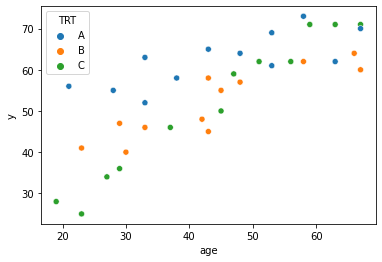

In [11]:
sns.scatterplot(data=df, x="age", y="y", hue="TRT")

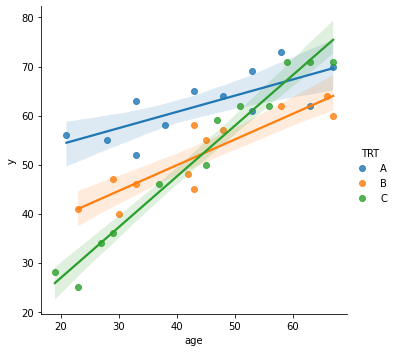

In [12]:
sns.lmplot(x='age',y='y',data=df,hue='TRT', fit_reg=True)

It shows that the effect of age on the predicted treatment effectiveness depends on the treatment given. That is, age appears to **interact** with treatment

In [13]:
y = df['y']
X = df[['age','x2','x3']]
X = sm.add_constant(X)
sm.OLS(y, X).fit().summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     38.71
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           9.29e-11
Time:                        16:13:13   Log-Likelihood:                -113.68
No. Observations:                  36   AIC:                             235.4
Df Residuals:                      32   BIC:                             241.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2906      3.505      6.359      0.000      15.151      29.430
age            0.6645      0.070      9.522      0.000       0.522       0.807
x2            10.2528      2.465      4.159      0.000       5.231      15.275
x3             0.4452      2.464      0.181      0.858      -4.574       5.464
==============================================================================
Omnibus:                        1.212   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.196
Skew:                          -0.347   Prob(JB):                        0.550
Kurtosis:                       2.438   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X['x12'] = X['age'] * X['x2']
X['x13'] = X['age'] * X['x3']

In [15]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     64.04
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           4.26e-15
Time:                        16:13:13   Log-Likelihood:                -97.024
No. Observations:                  36   AIC:                             206.0
Df Residuals:                      30   BIC:                             215.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2114      3.350      1.854      0.074      -0.630      13.052
age            1.0334      0.072     14.288      0.000       0.886       1.181
x2            41.3042      5.085      8.124      0.000      30.920      51.688
x3            22.7068      5.091      4.460      0.000      12.310      33.104
x12           -0.7029      0.109     -6.451      0.000      -0.925      -0.480
x13           -0.5097      0.110     -4.617      0.000      -0.735      -0.284
==============================================================================
Omnibus:                        2.593   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                1.475
Skew:                          -0.183   Prob(JB):                        0.478
Kurtosis:                       2.079   Cond. No.                         529.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we know that adding the interaction terms can help. It's actually important. Statisticians say "never interpret a main effect in the presence of an interaction"

#### We can come back to it later

#### Piecewise linear regression model

It utilizes interaction terms containing dummy variables

In [16]:
Image(url=os.path.join(filedir, "strength_watercement.png"), width=600, height=600)

In [17]:
Image(url=os.path.join(filedir, "piecewise_linear.png"), width=600, height=600)

In [18]:
Image(url=os.path.join(filedir, "piecewise_linear_result.png"), width=600, height=600)

#### Let's look at an example: shipment

An electronics company periodically imports shipments of a certain large part used as a component in several of its products. The size of the shipment varies depending upon production schedules. Small shipments (less than size 250) go to warehouse A; larger shipments are sent to warehouse B. The dataset contains cost of handling the shipment in the warehouse (y), the size of the shipment (x1)

In [19]:
df = pd.read_table(os.path.join(filedir, 'shipment.txt'), encoding='utf-8', delim_whitespace=True)
df

,y,x1
0,11.95,225
1,14.13,350
2,8.93,150
3,10.98,200
4,10.03,175
5,10.13,180
6,13.75,325
7,13.30,290
8,15.00,400
9,7.97,125


<AxesSubplot:xlabel='x1', ylabel='y'>

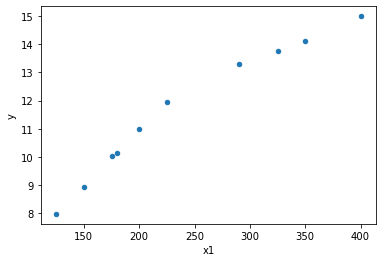

In [20]:
df.plot.scatter('x1','y')

In [21]:
mask = df['x1'] >= 250
df.loc[mask, 'is_large'] = 1
df.loc[~mask, 'is_large'] = 0

In [22]:
df['x2'] = df['is_large'] * (df['x1']-250)

In [23]:
y = df['y']
X = df[['x1','x2']]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
model.summary()

/Users/yuehuazhuang/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2938.
Date:                Sun, 19 Jun 2022   Prob (F-statistic):           5.81e-11
Time:                        16:13:13   Log-Likelihood:                 11.342
No. Observations:                  10   AIC:                            -16.68
Df Residuals:                       7   BIC:                            -15.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2139      0.179     17.998      0.000       2.792       3.636
x1             0.0385      0.001     40.254      0.000       0.036       0.041
x2            -0.0248      0.002    -15.051      0.000      -0.029      -0.021
==============================================================================
Omnibus:                        3.856   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                1.132
Skew:                           0.220   Prob(JB):                        0.568
Kurtosis:                       1.411   Cond. No.                     1.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
tmp = pd.DataFrame({
    'fit':model.predict(X),
    'actual':y,
    'x1':df['x1']}
)

In [26]:
tmp = tmp.sort_values('x1')

In [27]:
tmp.set_index('x1')

,fit,actual
x1,,
125,8.021416,7.97
150,8.982914,8.93
175,9.944412,10.03
180,10.136712,10.13
200,10.905911,10.98
225,11.867409,11.95
290,13.376370,13.30
325,13.855400,13.75
350,14.197564,14.13


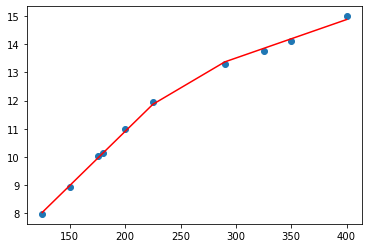

In [29]:
plt.plot(tmp['x1'], tmp['fit'], 'r')
plt.scatter(tmp['x1'], tmp['actual'])